In [1]:
# Define the object we use
class geminiData:
    GainLoss = 0
    Variance = 0
    Volume   = 0
    Hour     = 0
    Day      = 0

geminiDatas = []

In [3]:
# reference to this https://realpython.com/python-csv/
import csv

with open ('GEMINI_BTC.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count >= 2:
            line_count += 1
            #1: Date
            #2: Symbol
            #3: Open
            #4: High
            #5: Low
            #6: Close
            #7: Volume
            
            # Gain loss
            temp = geminiData()
            temp.GainLoss = float(row[3]) - float(row[6])
            # Variance
            temp.Variance = float(row[4]) - float(row[5])
            # Volume 
            temp.Volume = float( (row[7]))
            # Hour
            temp.Hour = row[1].split(" ")[1].split(":")[0]
            # Day
            temp.Day = row[1].split(" ")[0].split("-")[2]
            
            geminiDatas.append(temp) 
        else:
            line_count += 1
    print(f'Processed {line_count} lines.')
    
    
    
    

Processed 31190 lines.


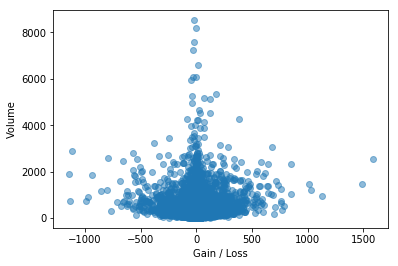

In [12]:
import matplotlib.pyplot as plt
x_vals,y_vals = zip(*[(float(i.GainLoss),float(i.Volume)) for i in geminiDatas])
plt.scatter(x_vals,y_vals, alpha=.5)
plt.xlabel("Gain / Loss")
plt.ylabel("Volume")
plt.show()

In [ ]:
import tensorflow as tf

n_steps = 20
n_inputs = 7
n_neurons = 100
n_outputs = 1
learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])
lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)

#dynamic_rnn to better use of GPU. could set swap_memory=true to avoid OOM errors
rnn_outputs, states = tf.nn.dynamic_rnn(lstm_cell, X, dtype=tf.float32) # tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, swap_memory=true)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = fully_connected(stacked_rnn_outputs, n_outputs,
activation_fn=None)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

logits = fully_connected(states, n_outputs, activation_fn=None)

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
init = tf.global_variables_initializer()

In [ ]:
n_iterations = 10000
batch_size = 50
with tf.Session() as sess:
init.run()
for iteration in range(n_iterations):
X_batch, y_batch = [...] # fetch the next training batch
sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
if iteration % 100 == 0:
mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
print(iteration, "\tMSE:", mse)